In [3]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

from precision_recall_cutoff import precision_recall_cutoff

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-448'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'In_Class_Assignments/turnover.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
turnover = pd.read_csv(file_content_stream)
turnover.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
## Changing sales and salary to dummies
turnover = pd.concat([turnover.drop(columns = ['sales', 'salary'], axis = 1), pd.get_dummies(turnover[['sales', 'salary']])], axis = 1)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


[Text(697.5, 951.3000000000001, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(348.75, 679.5, 'number_project <= 2.5\ngini = 0.478\nsamples = 3348\nvalue = [1326, 2022]'),
 Text(174.375, 407.70000000000005, 'last_evaluation <= 0.575\ngini = 0.214\nsamples = 1402\nvalue = [171, 1231]'),
 Text(87.1875, 135.89999999999998, 'gini = 0.105\nsamples = 1296\nvalue = [72, 1224]'),
 Text(261.5625, 135.89999999999998, 'gini = 0.123\nsamples = 106\nvalue = [99, 7]'),
 Text(523.125, 407.70000000000005, 'satisfaction_level <= 0.115\ngini = 0.483\nsamples = 1946\nvalue = [1155, 791]'),
 Text(435.9375, 135.89999999999998, 'gini = 0.0\nsamples = 698\nvalue = [0, 698]'),
 Text(610.3125, 135.89999999999998, 'gini = 0.138\nsamples = 1248\nvalue = [1155, 93]'),
 Text(1046.25, 679.5, 'time_spend_company <= 4.5\ngini = 0.174\nsamples = 8651\nvalue = [7816, 835]'),
 Text(871.875, 407.70000000000005, 'average_montly_hours <= 290.0\ngini = 0.029\nsamples = 7039\nvalue

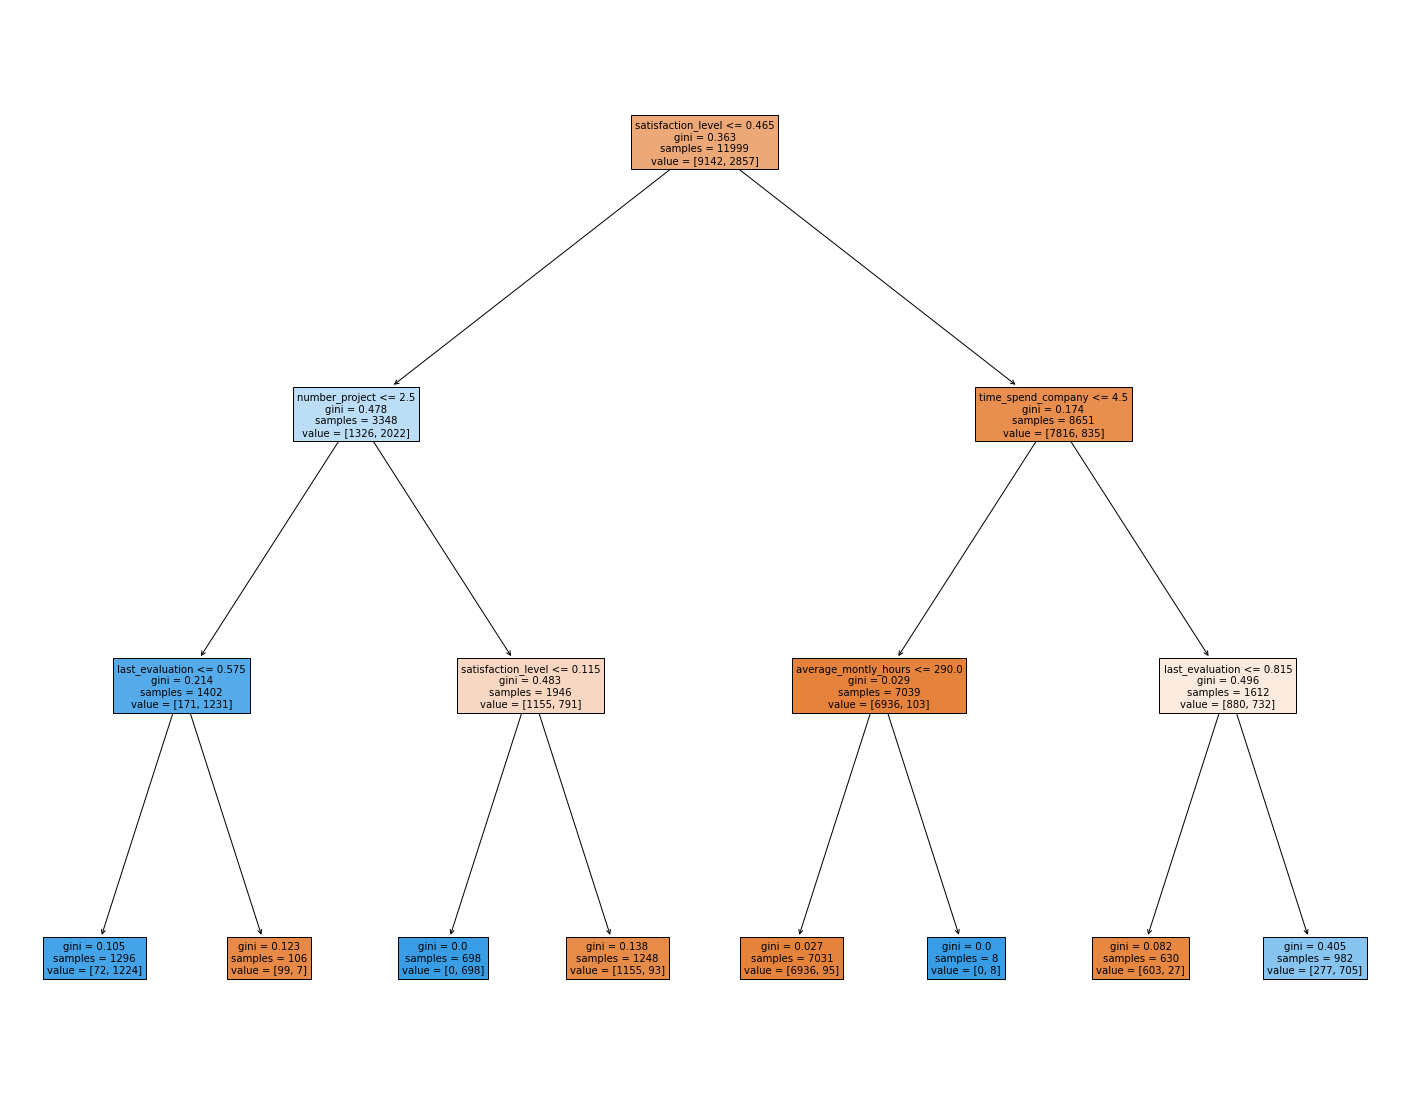

In [5]:
## Defining input and target variables
X = turnover.drop(columns = ['left'], axis = 1)
Y = turnover['left']

## Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

## Building decision  tree
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

fig = plt.figure(figsize = (25, 20))
plot_tree(tree_md, feature_names = X_train.columns, filled = True)

[Text(697.5, 951.3000000000001, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(348.75, 679.5, 'number_project <= 2.5\ngini = 0.478\nsamples = 3374\nvalue = [1337, 2037]'),
 Text(174.375, 407.70000000000005, 'last_evaluation <= 0.575\ngini = 0.203\nsamples = 1401\nvalue = [161, 1240]'),
 Text(87.1875, 135.89999999999998, 'gini = 0.1\nsamples = 1304\nvalue = [69, 1235]'),
 Text(261.5625, 135.89999999999998, 'gini = 0.098\nsamples = 97\nvalue = [92, 5]'),
 Text(523.125, 407.70000000000005, 'satisfaction_level <= 0.115\ngini = 0.482\nsamples = 1973\nvalue = [1176, 797]'),
 Text(435.9375, 135.89999999999998, 'gini = 0.0\nsamples = 708\nvalue = [0, 708]'),
 Text(610.3125, 135.89999999999998, 'gini = 0.131\nsamples = 1265\nvalue = [1176, 89]'),
 Text(1046.25, 679.5, 'time_spend_company <= 4.5\ngini = 0.172\nsamples = 8625\nvalue = [7805, 820]'),
 Text(871.875, 407.70000000000005, 'average_montly_hours <= 290.5\ngini = 0.029\nsamples = 7049\nvalue = 

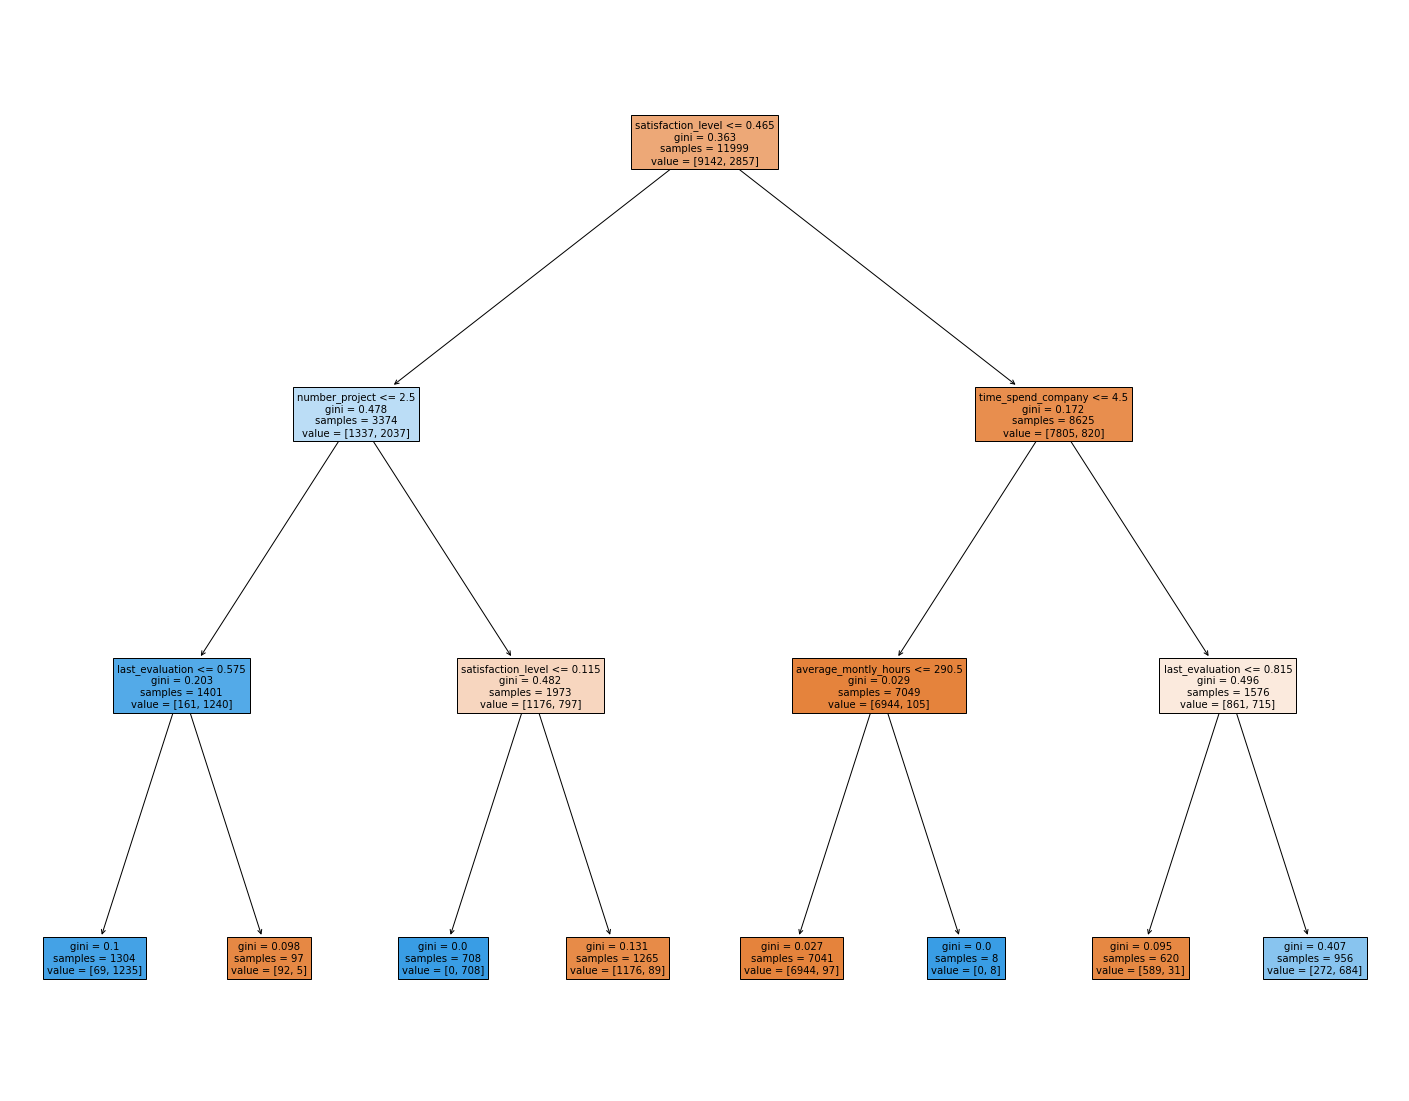

In [6]:
## Defining input and target variables
X = turnover.drop(columns = ['left'], axis = 1)
Y = turnover['left']

## Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

## Building decision  tree
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

fig = plt.figure(figsize = (25, 20))
plot_tree(tree_md, feature_names = X_train.columns, filled = True)

[Text(697.5, 951.3000000000001, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(348.75, 679.5, 'number_project <= 2.5\ngini = 0.476\nsamples = 3332\nvalue = [1301, 2031]'),
 Text(174.375, 407.70000000000005, 'last_evaluation <= 0.575\ngini = 0.205\nsamples = 1371\nvalue = [159, 1212]'),
 Text(87.1875, 135.89999999999998, 'gini = 0.101\nsamples = 1276\nvalue = [68, 1208]'),
 Text(261.5625, 135.89999999999998, 'gini = 0.081\nsamples = 95\nvalue = [91, 4]'),
 Text(523.125, 407.70000000000005, 'satisfaction_level <= 0.115\ngini = 0.486\nsamples = 1961\nvalue = [1142, 819]'),
 Text(435.9375, 135.89999999999998, 'gini = 0.0\nsamples = 726\nvalue = [0, 726]'),
 Text(610.3125, 135.89999999999998, 'gini = 0.139\nsamples = 1235\nvalue = [1142, 93]'),
 Text(1046.25, 679.5, 'time_spend_company <= 4.5\ngini = 0.172\nsamples = 8667\nvalue = [7841, 826]'),
 Text(871.875, 407.70000000000005, 'average_montly_hours <= 290.5\ngini = 0.027\nsamples = 7092\nvalue 

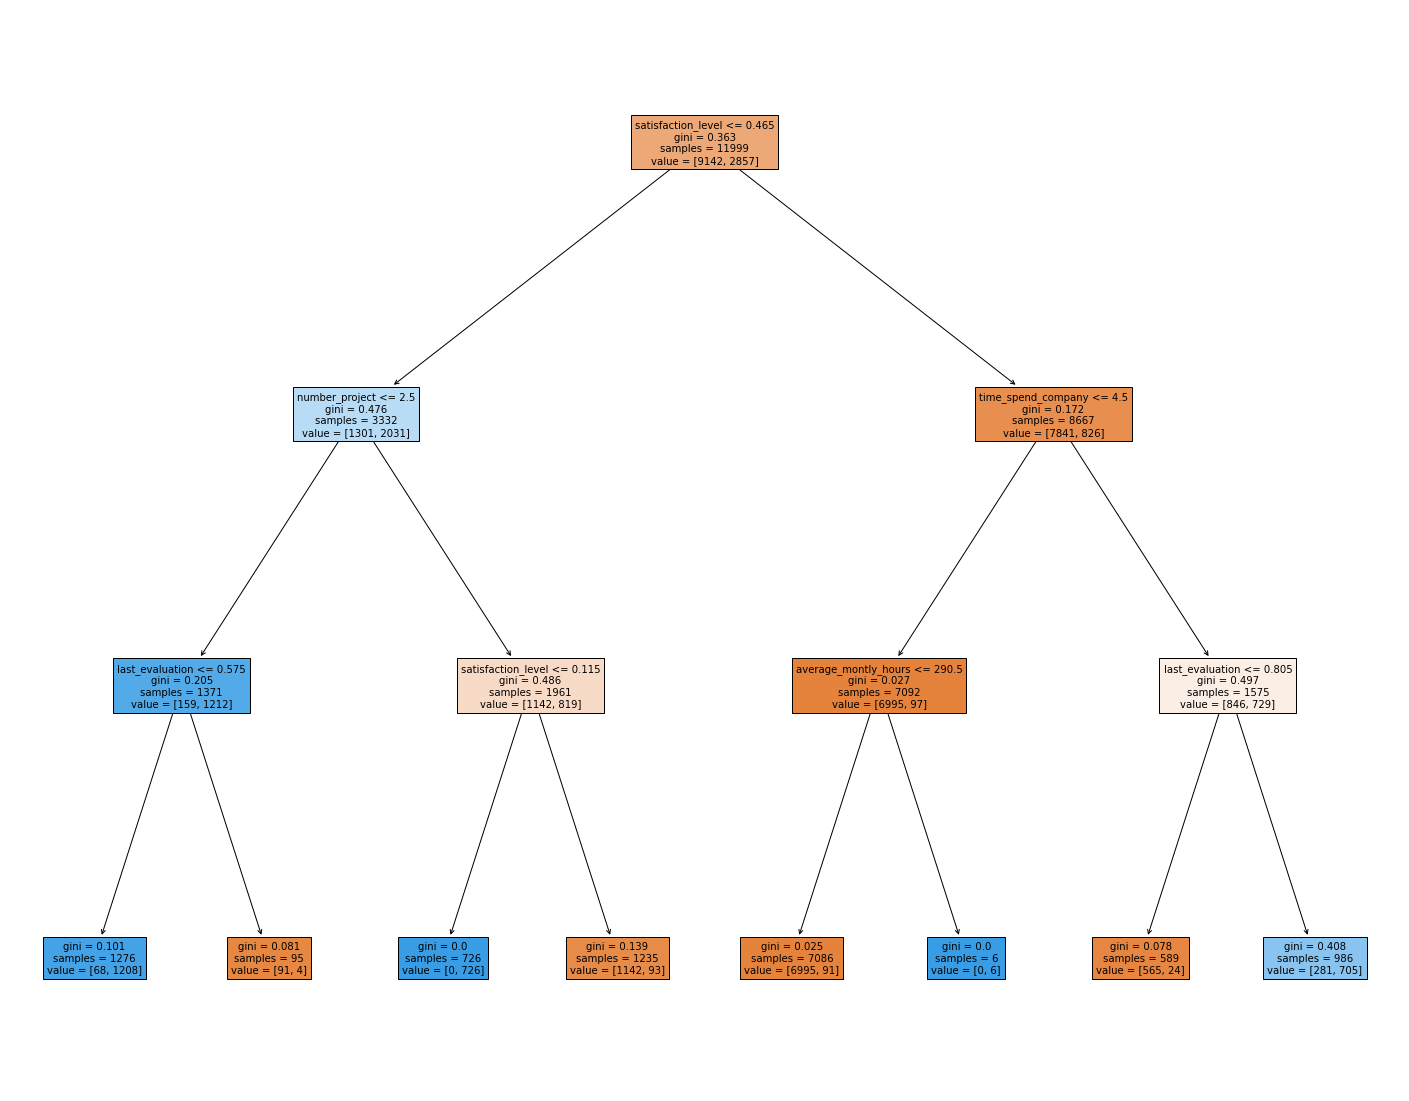

In [7]:
## Defining input and target variables
X = turnover.drop(columns = ['left'], axis = 1)
Y = turnover['left']

## Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

## Building decision  tree
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

fig = plt.figure(figsize = (25, 20))
plot_tree(tree_md, feature_names = X_train.columns, filled = True)

In [8]:
## Engineering features from the decision tree model 
turnover['interaction_1'] = np.where(((turnover['satisfaction_level'] >= 0.115) & 
                                      (turnover['satisfaction_level'] <= 0.465) & 
                                      (turnover['number_project'] > 2.5)), 1, 0)

turnover['interaction_2'] = np.where(((turnover['satisfaction_level'] <= 0.465) & 
                                      (turnover['number_project'] <= 2.5) & 
                                      (turnover['last_evaluation'] <= 0.575)), 1, 0)

turnover['interaction_3'] = np.where(((turnover['satisfaction_level'] > 0.465) & 
                                      (turnover['time_spend_company'] <= 4.5) & 
                                      (turnover['average_montly_hours'] <= 290.5)), 1, 0)

turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,interaction_1,interaction_2,interaction_3
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
